In [2]:
import nltk
nltk.download('stopwords')

nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS

In [5]:
from google.colab import files 
uploaded = files.upload()


Saving Elon_musk.csv to Elon_musk.csv


In [6]:
data = pd.read_csv('Elon_musk.csv',encoding="latin-1")
data.head()


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [7]:
#Checking for NaN values
data.isna().sum()


Unnamed: 0    0
Text          0
dtype: int64

In [8]:
#Number of Words in single tweet
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()


,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [9]:
#Number of characters in single tweet
data['char_count'] = data['Text'].str.len() ## this also includes spaces
data[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


# Average Word Length

In [10]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [11]:
data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


# Number of stopwords

In [12]:
stop = stopwords.words('english')

In [13]:
data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()


,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


#Number of Special Characters

In [14]:
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()


,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


# Number of Numerics

In [15]:
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


# Number of Upper Case Words


In [16]:
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head()


,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


# Pre - Processing


Lower Case

In [17]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

Removing Punctuation

In [18]:
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

<ipython-input-18-5a2099d0f9da>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

Removal of Stop Words

In [19]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()


0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

Common word removal

In [20]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [21]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

Rare Words Removal

In [22]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [23]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

Spelling correction

In [24]:
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

Tokenization

In [25]:
nltk.download('punkt')

TextBlob(data['Text'][1]).words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

Stemming

In [26]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

Lemmatization

In [27]:
from textblob import Word

nltk.download('omw-1.4')

data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

# Advanced Text Processing


N-grams

In [28]:
TextBlob(data['Text'][0]).ngrams(2)


[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

Term frequency


Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [29]:
tf1 = (data['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1


,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,nextlevel,1
6,tried,1


Inverse Document Frequency
 
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.


In [30]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))

tf1


,words,tf,idf
0,id_aa_carmack,1,4.166415
1,ray,1,5.035453
2,tracing,1,7.600402
3,cyberpunk,1,5.115496
4,hdr,1,6.907255
5,nextlevel,1,6.907255
6,tried,1,5.808643


Term Frequency – Inverse Document Frequency (TF-IDF)

In [31]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1


,words,tf,idf,tfidf
0,id_aa_carmack,1,4.166415,4.166415
1,ray,1,5.035453,5.035453
2,tracing,1,7.600402,7.600402
3,cyberpunk,1,5.115496,5.115496
4,hdr,1,6.907255,6.907255
5,nextlevel,1,6.907255,6.907255
6,tried,1,5.808643,5.808643


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect


<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7374 stored elements in Compressed Sparse Row format>

Bag of Words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow


<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8020 stored elements in Compressed Sparse Row format>

# wordclouding

In [39]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");



In [35]:
# Joining the list into one string/text
text = ' '.join(data)
text


'Unnamed: 0 Text word_count char_count avg_word stopwords hastags numerics upper'

In [40]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')


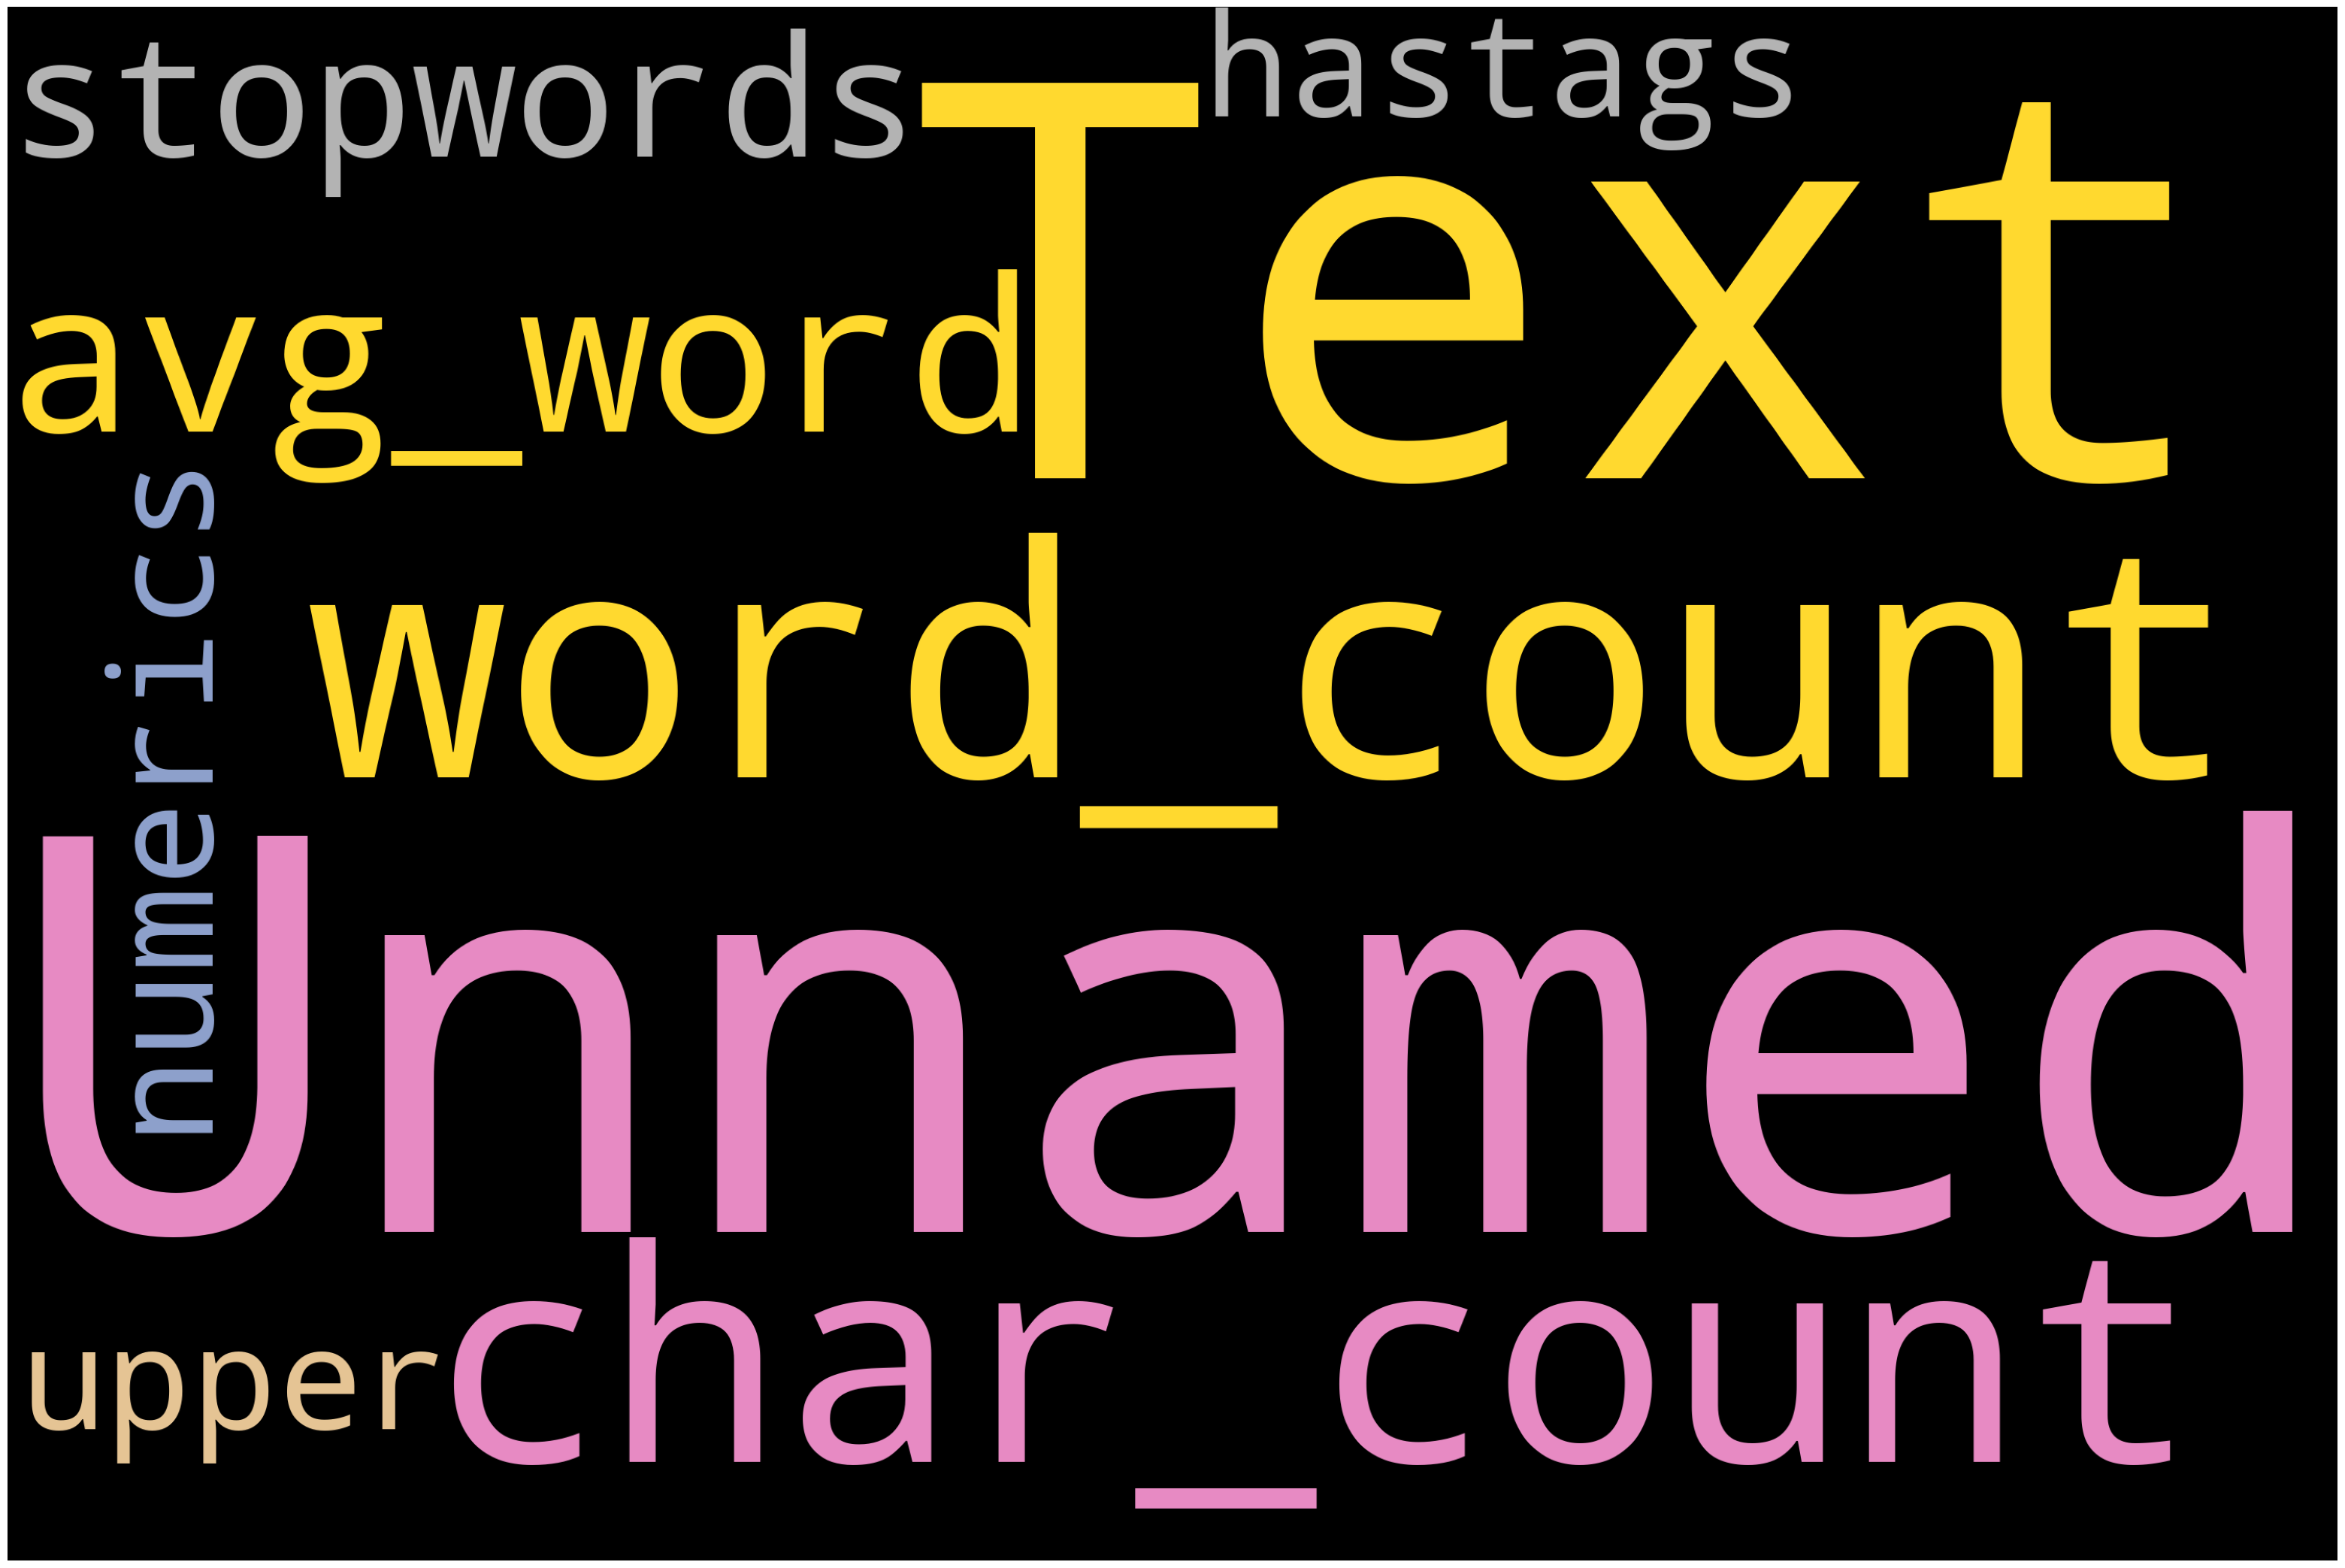

In [41]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)


#Sentiment Analysis

In [42]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)


0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [43]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()


,Text,sentiment
0,kunalb11 im alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.00
2,joerogan spotify interview,0.00
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20
